In [1]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn import ensemble

df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Define outcome and predictors, and set the outcomes to `0` and `1`.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable `cntry` into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.8)

# Put 80% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 20% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [2]:
params = {'loss': 'exponential',
         'learning_rate': 0.2,
         'n_estimators': 700}

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [3]:
def plot_confusion_matrix(cm, classes, normalize, title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
  """
  This function prints and plots the confusion matrix. 
  Normalization can be applied by setting 'normalize = True'.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = 'center', verticalalignment = 'center',
             color = 'white' if  cm[i, j] > thresh else 'black')
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

Confusion matrix, without normalization
Normalized confusion matrix


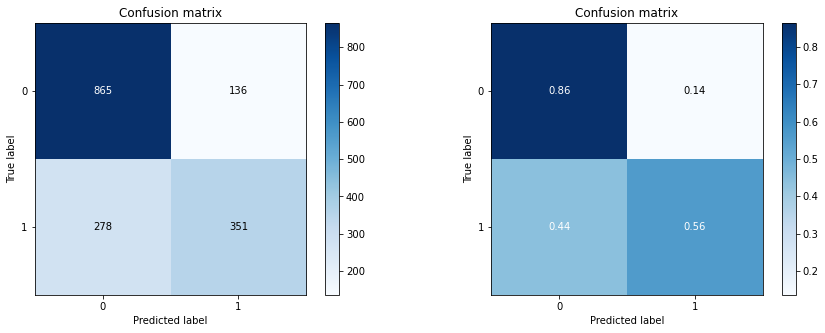

In [4]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm, [0, 1], False)

plt.subplot(1, 2, 2)
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],True)

plt.show()

In [5]:
# Calculate Accuracy.
print("Accuracy: {}".format(clf.score(X_test, y_test)))

# Calculate precision.
y_pred = clf.predict(X_test)
print("Precision: {}".format(precision_score(y_test, y_pred)))

# Calculate recall.
print("Recall: {}".format(recall_score(y_test, y_pred)))

Accuracy: 0.7460122699386503
Precision: 0.7207392197125256
Recall: 0.5580286168521462


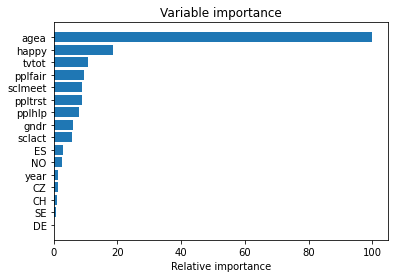

In [6]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
#plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center') 
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel("Relative importance")
plt.title("Variable importance")
plt.show()